## ImportingPython Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import psycopg2
from sqlalchemy import create_engine

## Loading and Extracting the Walmart Sales Dataset

In [4]:
import pandas as pd
try:
    df = pd.read_csv(r"C:\Users\DELL\Downloads\Walmart_Dataset.csv")
    print("✅ Dataset loaded successfully!")
    print(sales_df.head())
    print(f"Shape: {sales_df.shape}")
    print("Columns:", sales_df.columns.tolist())
except Exception as error:
    print("❌ Failed to load dataset:", error)


✅ Dataset loaded successfully!
❌ Failed to load dataset: name 'sales_df' is not defined


In [5]:
df

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
...,...,...,...,...,...,...,...,...,...,...,...
10046,9996,WALM056,Rowlett,Fashion accessories,$37,3.0,03/08/23,10:10:00,Cash,3.0,0.33
10047,9997,WALM030,Richardson,Home and lifestyle,$58,2.0,22/02/21,14:20:00,Cash,7.0,0.48
10048,9998,WALM050,Victoria,Fashion accessories,$52,3.0,15/06/23,16:00:00,Credit card,4.0,0.48
10049,9999,WALM032,Tyler,Home and lifestyle,$79,2.0,25/02/21,12:25:00,Cash,7.0,0.48


## DATA CLEANING

In [7]:
df.shape

(10051, 11)

In [8]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [10]:
# The dataset contains some missing entries in the unit_price and quantity columns, which may affect calculations involving sales totals or product-level analytics. These missing values will need to be addressed during the data cleaning phase to ensure analysis accuracy.
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [11]:
# dropping all rows with nulls values.
df.dropna(inplace= True)

In [12]:
# varifying null values
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [13]:
# checking duplicates
df.duplicated().sum()

51

In [14]:
# dropping duplicates
df.drop_duplicates(inplace= True)

In [15]:
# vefifying duplicates
df.duplicated().sum()

0

In [16]:
df.shape

(9969, 11)

# DATA MANIPULATION

In [18]:
# The unit_price column contains dollar signs and is stored as an object; it needs to be converted to an integer for numerical analysis.
df['unit_price'] = df['unit_price'].str.replace('$', '').astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [20]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [21]:
# creating a new column "total".
df['total'] = df['unit_price'] * df['quantity']

In [22]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [23]:
# converting "date" column from object to datetime. 
df['date'] = pd.to_datetime(df['date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\2704643962.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   Branch          9969 non-null   object        
 2   City            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   float64       
 6   date            9969 non-null   datetime64[ns]
 7   time            9969 non-null   object        
 8   payment_method  9969 non-null   object        
 9   rating          9969 non-null   float64       
 10  profit_margin   9969 non-null   float64       
 11  total           9969 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 1012.5+ KB


In [25]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

In [26]:
df.columns = df.columns.str.lower()

In [27]:
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17


## DATA EXPLORATION


`Branch Performance: Identifying the Branch with the Highest Overall Sales`

In [30]:
df.groupby('branch')['total'].sum().sort_values(ascending= False).head(3)

branch
WALM009    25688.34
WALM074    25555.42
WALM003    24950.56
Name: total, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\73385923.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='branch', y='total', data=branch_sales.head(10), palette='Blues_d')


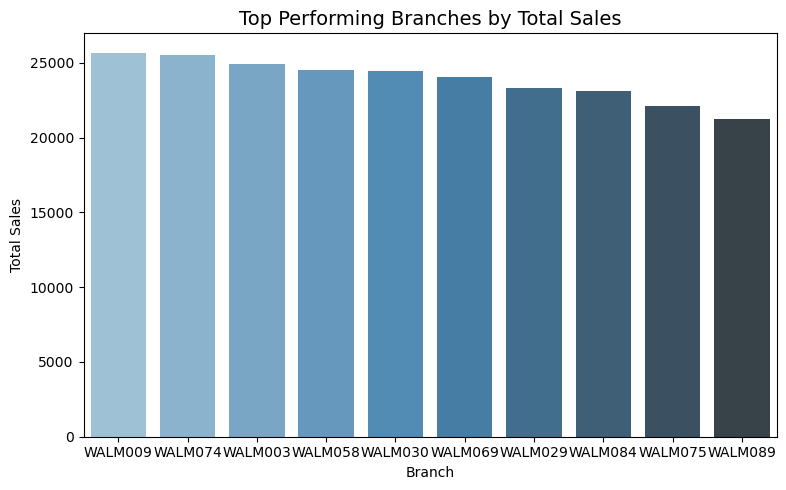

In [31]:
# Calculate and plot total sales by branch
branch_sales = df.groupby('branch', as_index=False)['total'].sum().sort_values(by='total', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='branch', y='total', data=branch_sales.head(10), palette='Blues_d')
plt.title('Top Performing Branches by Total Sales', fontsize=14)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


`Category Analysis: Highest Revenue-Generating Categories Based on Total Sales`

In [33]:
df.groupby('category')['total'].sum().sort_values(ascending= False)

category
Fashion accessories       489480.90
Home and lifestyle        489250.06
Electronic accessories     78175.03
Food and beverages         53471.28
Sports and travel          52497.93
Health and beauty          46851.18
Name: total, dtype: float64

`City Analysis: Cities with the Highest Total Revenue`

In [35]:
df.groupby('city')['total'].sum().sort_values(ascending= False).head(3)

city
Weslaco       46351.79
Waxahachie    40703.33
Plano         25688.34
Name: total, dtype: float64

`Monthly Trends: Sales Trends by Month for Each Branch`

In [37]:
df['month'] = df['date'].dt.to_period('M')

In [38]:
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total,month
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,522.83,2019-05
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,76.40,2019-08
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,324.31,2019-03
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,465.76,2019-01
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,604.17,2019-08


In [39]:
monthly_trends_branch = df.groupby(['month', 'branch'])['total'].sum().reset_index()
monthly_trends_branch

,month,branch,total
0,2019-01,WALM001,838.32
1,2019-01,WALM002,1014.92
2,2019-01,WALM003,2717.39
3,2019-01,WALM004,831.56
4,2019-01,WALM005,782.91
...,...,...,...
4085,2023-12,WALM096,393.00
4086,2023-12,WALM097,222.00
4087,2023-12,WALM098,280.00
4088,2023-12,WALM099,1371.00


In [40]:
monthly_trends_branch['month'] = monthly_trends_branch['month'].astype(str)

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\1445400109.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


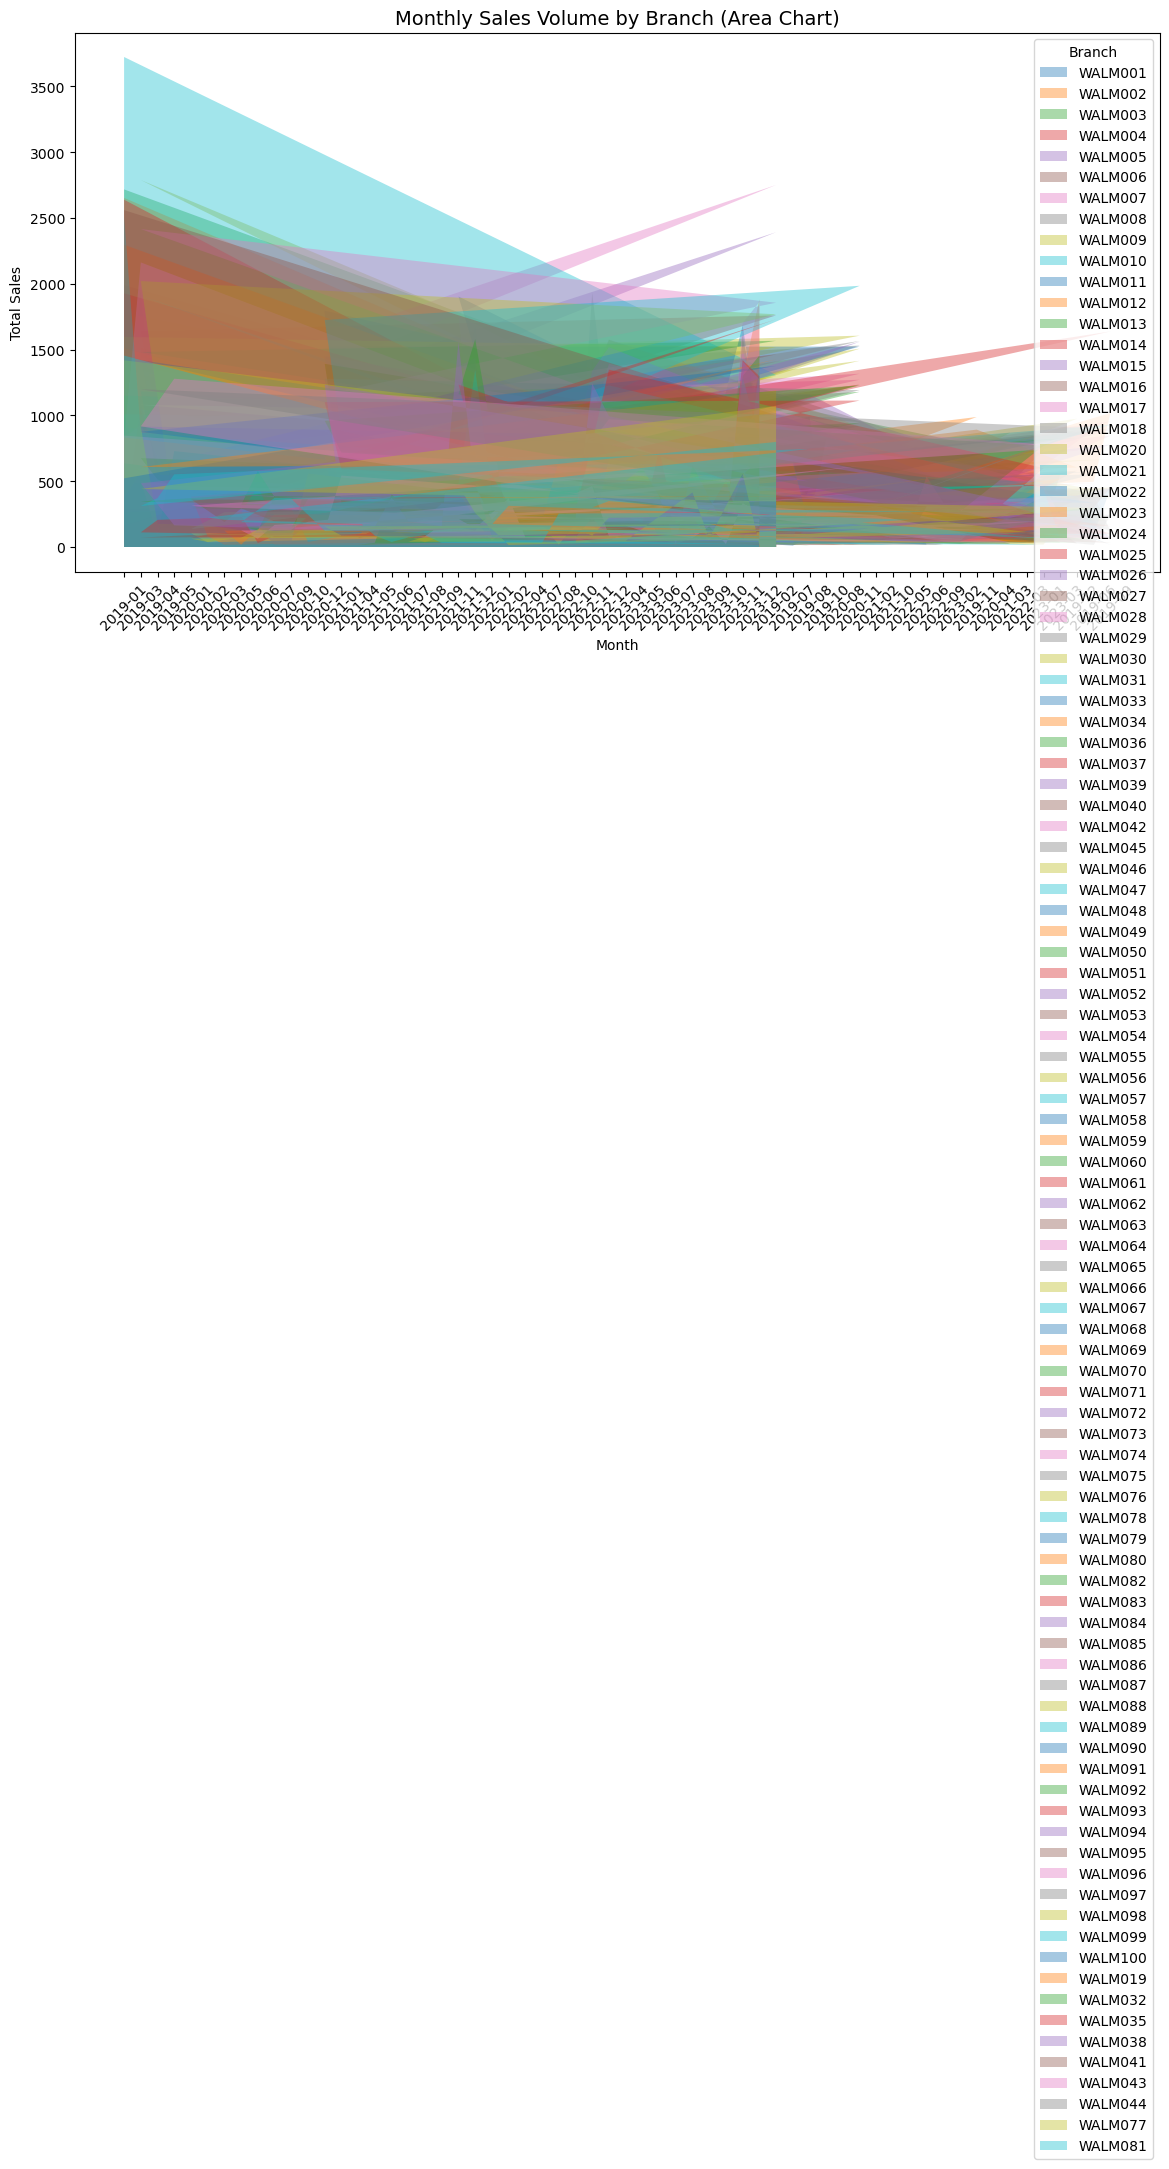

In [41]:
plt.figure(figsize=(14, 7))
for branch in monthly_trends_branch['branch'].unique():
    branch_data = monthly_trends_branch[monthly_trends_branch['branch'] == branch]
    plt.fill_between(branch_data['month'], branch_data['total'], label=branch, alpha=0.4)

plt.title('Monthly Sales Volume by Branch (Area Chart)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Branch')
plt.tight_layout()
plt.show()


`Payment Methods: Most Frequently Used Payment Options`

In [43]:
payment_counts = df['payment_method'].value_counts()
print(payment_counts)

payment_method
Credit card    4256
Ewallet        3881
Cash           1832
Name: count, dtype: int64


`Feedback Analysis: Average Customer Rating by Branch`

In [45]:
df.groupby('branch')['rating'].mean().sort_values(ascending= False).head(5)

branch
WALM004    7.001667
WALM076    6.812162
WALM059    6.732911
WALM026    6.678082
WALM034    6.671429
Name: rating, dtype: float64

In [46]:
df.groupby('branch')['rating'].mean().sort_values().head(5)

branch
WALM056    4.989349
WALM065    5.042045
WALM054    5.064571
WALM075    5.076064
WALM099    5.084242
Name: rating, dtype: float64

`Time Analysis: Which Time of Day—Morning, Afternoon, or Evening—Drives the Highest Sales?`

In [48]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [49]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_period'] = df['time'].dt.hour.apply(categorize_time)


In [50]:
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total,month,time_period
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,1900-01-01 13:08:00,Ewallet,9.1,0.48,522.83,2019-05,Afternoon
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,1900-01-01 10:29:00,Cash,9.6,0.48,76.40,2019-08,Morning
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,0.33,324.31,2019-03,Afternoon
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,0.33,465.76,2019-01,Evening
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,1900-01-01 10:37:00,Ewallet,5.3,0.48,604.17,2019-08,Morning


In [51]:
sales_by_time = df.groupby('time_period')['total'].sum().sort_values(ascending= False)
sales_by_time

time_period
Evening      467021.76
Afternoon    462516.61
Morning      251507.01
Night         28681.00
Name: total, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\678800662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_time.index, y=sales_by_time.values, palette='Blues_d')


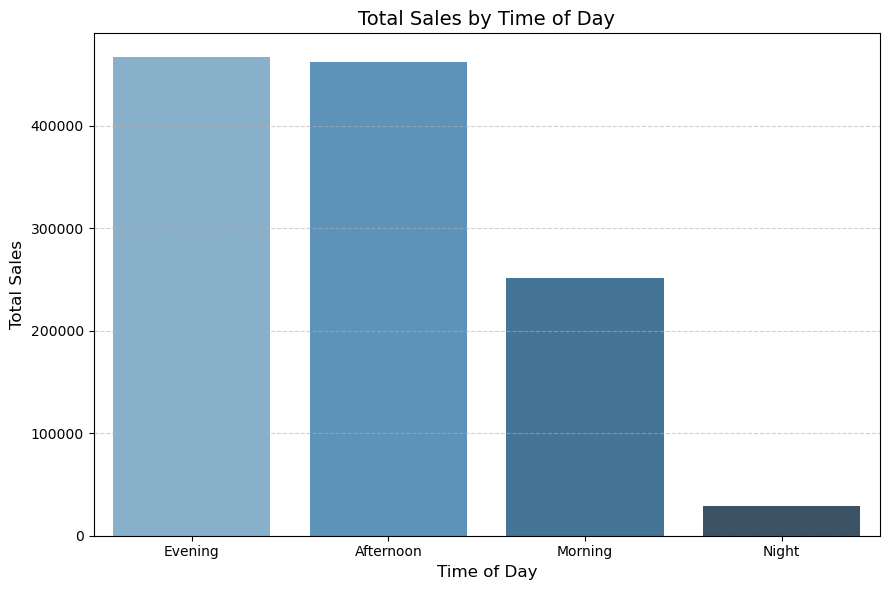

In [52]:
plt.figure(figsize=(9, 6))
sns.barplot(x=sales_by_time.index, y=sales_by_time.values, palette='Blues_d')

plt.title('Total Sales by Time of Day', fontsize=14)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



`Top Products: Most Frequently Sold Product Categories`

In [54]:
top_categories = df.groupby('category')['quantity'].sum().sort_values(ascending= False)
top_categories

category
Fashion accessories       9653.0
Home and lifestyle        9610.0
Electronic accessories    1494.0
Food and beverages         952.0
Sports and travel          920.0
Health and beauty          854.0
Name: quantity, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_26712\1009381695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


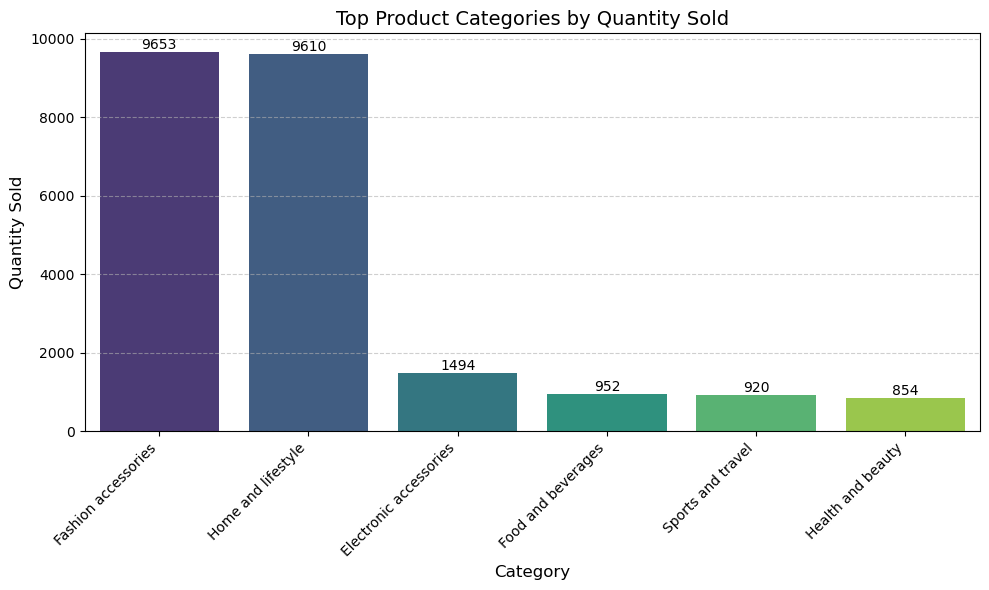

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title('Top Product Categories by Quantity Sold', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Optional: Add value labels on top of bars
for index, value in enumerate(top_categories.values):
    plt.text(index, value + 1, f'{int(value)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


`Price vs. Quantity: Exploring the Relationship Between Unit Price and Quantity Sold`

In [57]:
correlation_value = df['unit_price'].corr(df['quantity'])
print(f"Correlation between Unit Price and Quantity Sold: {correlation_value}")

Correlation between Unit Price and Quantity Sold: 0.06178873675107538


`Average Sales: How Much Is Earned on Average per Invoice?`

In [59]:
average_sales_per_invoice = df.groupby('invoice_id')['total'].sum().mean()
print(f"Average Total Sales per Invoice: {average_sales_per_invoice:.2f}")

Average Total Sales per Invoice: 121.35


In [60]:
username = "postgres"
password = "8929"     
host = "localhost"
port = "5432"
database = "walmart_db"
engine_psql = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

In [61]:
period_columns = df.select_dtypes(include=['period[M]']).columns
print("Columns with Period dtype:", period_columns)

Columns with Period dtype: Index(['month'], dtype='object')


In [62]:
for col in period_columns:
    df[col] = df[col].astype(str)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9969 non-null   int64         
 1   branch          9969 non-null   object        
 2   city            9969 non-null   object        
 3   category        9969 non-null   object        
 4   unit_price      9969 non-null   float64       
 5   quantity        9969 non-null   float64       
 6   date            9969 non-null   datetime64[ns]
 7   time            9969 non-null   datetime64[ns]
 8   payment_method  9969 non-null   object        
 9   rating          9969 non-null   float64       
 10  profit_margin   9969 non-null   float64       
 11  total           9969 non-null   float64       
 12  month           9969 non-null   object        
 13  time_period     9969 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory 

In [64]:
df.to_sql(name='walmart', con=engine_psql, if_exists='replace', index=False)

969

In [65]:
df.head()

,invoice_id,branch,city,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total,month,time_period
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,1900-01-01 13:08:00,Ewallet,9.1,0.48,522.83,2019-05,Afternoon
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,1900-01-01 10:29:00,Cash,9.6,0.48,76.40,2019-08,Morning
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,0.33,324.31,2019-03,Afternoon
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,0.33,465.76,2019-01,Evening
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,1900-01-01 10:37:00,Ewallet,5.3,0.48,604.17,2019-08,Morning
